<a href="https://colab.research.google.com/github/GustavoGDM/Gestao_do_Conhecimento-/blob/master/Semana_10_Trabalho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gestão do Conhecimento
0050017151 - Gustavo Duarte

In [0]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston


In [226]:
dataset = load_boston()
dataframe = pd.DataFrame(dataset.data,columns=(dataset.feature_names))
dataframe['target'] = dataset.target
print(type(dataset))
print(type(dataframe))

<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>


In [227]:
#1-Mostre os primeiros registros da tabela
dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [230]:
#2-Observações(linhas) possui nessa base? Quantas Colunas?
print(len(dataframe.index))

506


In [0]:
#3-Quantas Features Possui?
print(len(dataframe.iloc[:,0:13].columns))


In [231]:
#4-Qual é o campo Target(respostas) dessa base?
print('dataset.target,dataframe["tagert"]')

dataset.target,dataframe["tagert"]


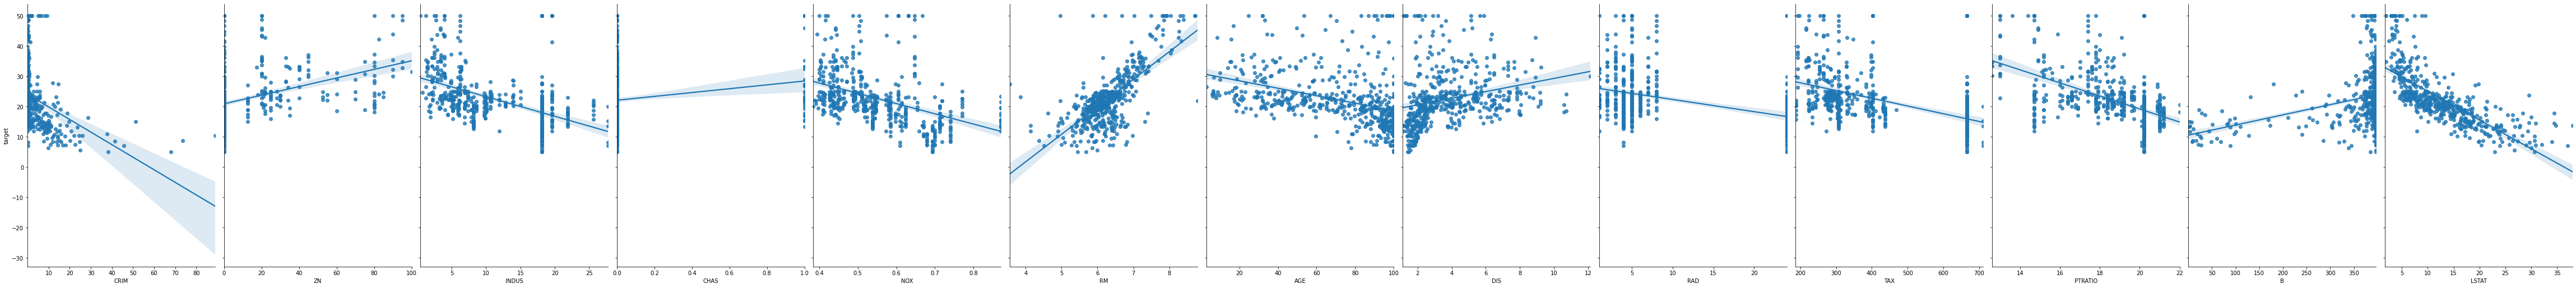

In [232]:
#5-Usando a biblioteca de visualização seaborn, plote o gráfico que mostra a relação entre as features e responses
import seaborn as sns
%matplotlib inline
sns.pairplot(dataframe, x_vars=dataframe.iloc[:,0:13].columns, y_vars='target',height=7,aspect=0.7, kind='reg')

In [0]:
#6-Prepare X e y usando o pandas
from sklearn import preprocessing
y = lab_enc.fit_transform(dataframe['target'].to_numpy())
X = dataframe.iloc[:,0:13].to_numpy()

In [209]:
#7-Qual o tipo de dados de X e y?
print(type(y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [234]:
#8-Sobre o que se trata essa base de dados? Que tipo de informações ela guarda?
dataset.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [0]:
#9-Gere um X de treino e y de treino, X de teste e y da base (Split Train/Test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [164]:
#10-Qual o percentual gerado para criar o conjunto de treino e o conjunto de teste?
print('teste 40%, train 60%')


teste 40%, train 60%


In [238]:
#11-Usando modelo de regressão linear do sklearn, treine o modelo com o X e y de treino
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [239]:
#12-Imprima os atributos de "intercept" e "coefficients" que foram gerados
print(linreg.intercept_)
print(linreg.coef_)

248.10440623032736
[-8.91667343e-01  2.43433784e-01  1.36824270e-01  1.40355340e+01
 -1.06565173e+02  1.61234002e+01 -8.24397021e-02 -8.54374239e+00
  2.33727184e+00 -1.10912366e-01 -5.26043026e+00  7.11662235e-02
 -3.87668395e+00]


In [240]:
#13-imprima o par "feature names" com os "coefficients"
feature_cols = dataframe.iloc[:,0:13].columns
list(zip(feature_cols, linreg.coef_))

[('CRIM', -0.8916673434348538),
 ('ZN', 0.2434337841733864),
 ('INDUS', 0.13682426963649894),
 ('CHAS', 14.035533978621524),
 ('NOX', -106.56517300681209),
 ('RM', 16.12340019793717),
 ('AGE', -0.08243970210345418),
 ('DIS', -8.543742393784553),
 ('RAD', 2.3372718357883655),
 ('TAX', -0.11091236643608915),
 ('PTRATIO', -5.260430260882921),
 ('B', 0.07116622352600438),
 ('LSTAT', -3.8766839509639075)]

In [248]:
#14-Faça uma previsão usando o conjunto de X de teste
y_perd = linreg.predict(X_test)
print(y_perd)


[ 35.49854936 143.65116583  89.07739128  75.60456609 198.48106125
 139.01764283 169.98296216  92.54782631  75.84983213 100.59036572
 151.48677242 154.05782227  99.45661383 169.44204096 108.27505675
  49.42041954 107.16753178  26.85784375  35.839131    58.70664989
 -17.74294978  73.19828788 101.55793767 109.05335182  81.77480395
  97.34675177  75.4181106   56.48860339  97.52804173  76.31125422
  47.95443747 126.94792612 174.82304191 114.58236013  75.140425
  81.98264914 163.35786964 193.45092886 129.01463862 138.4032587
 196.88692536 170.82675438  83.84468206 175.42122109 172.31842458
 135.67083427 220.59280986  84.74666935  90.29025928 124.05614284
 185.54550428 129.43484987  73.17924428 154.57637368  49.3526306
 118.46441116 122.59978366 186.80831651  83.76384972 199.63603891
  67.96653217  84.68000223 174.29006211  59.70649682 212.87295338
 148.19290305 168.71630865   7.20431585  90.92183029 111.1734614
 123.64610691 117.44142759 118.65915909 152.70467883  70.57084788
 121.02038247  

In [251]:
#15-Mostre a margem de error, usando o método "Root Mean Squared Error (RMSE)"
print(np.sqrt(metrics.mean_squared_error(y_test, y_perd)))

27.97322151753102


In [299]:
#16-Existe uma forma de melhorar essa margem para que fique menor? Se sim, como seria?
feature_cols = ['ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = dataframe[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

26.287077345464635
